## INFO 2950 Final Project: Phase 5

## Table of Contents
1. Introduction
    - Key Terms
    - Research Questions
    - Summary of Findings
2. Data Description
3. Preregistration Statements
4. Hypothesis 1
    - Data Analysis
    - Evaluation of Significance
5. Hypothesis 2
    - Data Analysis
    - Evaluation of Significance
6. Interpretation and Conclusions
7. Limitations
8. Appendix - Data Cleaning

## Introduction
The question of happiness has been commonly pondered and explored throughout history. People have constantly looked for the best way to live their lives and seek happiness. Whether it's defined by personal achievements, meaningful relationships, or moments of delight, the concept of happiness is an important part of the human experience, shaping our perspectives, decisions, and the overall quality of our lives.

Our research aims to shed light on this question by examining how different areas of life can play a role in influencing countries' happiness scores. Though happiness has been commonly studied, our research is differentiated because it combines the impact of different factors in the areas of health, economics, and demography, which are typically analyzed separately. 

In particular, factors we have chosen to study are suicide rate, birth rate, minimum wage, crime index, and population size. We chose factors from a wide range of areas because we are interested in understanding if different aspects of lifestyle (ie. health, economics, and demography) have more weight than others in influencing happiness.

Understanding how these various factors can influence happiness is important on a personal level because every individual is invested in their own happiness. However, this research can also be used extract broader insights into the way different societies are structured and how that can subsequently affect happiness. Thus, the findings from this research can be used as a basis for informing policy decisions that can have the potential to increase happiness worldwide.

## Key Terms
1) **Suicide rate**: Number of suicide deaths in a year, divided by the population and multiplied by 100,000.
(Source: https://www.who.int/data/gho)

2) **World happiness score**: A publication that contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various (quality of) life factors.
(Source: https://en.wikipedia.org/wiki/World_Happiness_Report)

3) **Population size**: The number of individuals present in a subjectively designated geographic range. (Source: https://www.nature.com)

4) **Minimum wage**: The lowest remuneration that employers can legally pay their employees—the price floor below which employees may not sell their labor. (Source: https://en.wikipedia.org/wiki/Minimum_wage)

5) **Crime index**: The crime rate per 1,000 population for all crimes in a specific neighborhood or city. (Source: https://help.neighborhoodscout.com)

6) **Birth rate**: The total number of live human births per 1,000 population for a given period divided by the length of the period in years. (Source: https://en.wikipedia.org/wiki/Birth_rate)

7) **Bootstrapping**: A method of inferring results for a population from results found on a collection of smaller random samples of that population, using replacement during the sampling process. (Source: https://www.mastersindatascience.org/learning/machine-learning-algorithms/bootstrapping/)

8) **Heteroskedasticity**: Happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant. (Source: https://www.investopedia.com)

10) **Multivariable linear regression**: A statistical technique that uses several explanatory variables to predict the outcome of a response variable. (Source: https://www.investopedia.com/terms/m/mlr.asp)

## Research Question:
**Main Question**: Among the factors of suicide rate, birth rate, minimum wage, crime index, and population size, which are the most prominent in influencing “happiness”? 

To answer this question, we use the following sub-questions to assist:

1) Is there a relationship between the levels of suicide rate and a country's happiness score?

2) Do birth rates, minimum wage, and crime index have correlations to population size? And does the population size have a relationship with happiness score? 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import duckdb
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import plotly.express as px

## Data Description:

### __MOTIVATION__
__Why was this dataset created?__
- Our dataset was created to observe the factors that influenced life satisfaction in various countries. We wanted to isolate factors that demonstrated the strongest correlation to overall happiness. The five datasets we analyzed all compared individual factors that would influence or measure the wellbeing of the country. Their purpose was to capture the overall state of different countries. 

__Who funded the creation of the dataset?__
- These datasets took information from organizations like the “World Health Organization”, “World bank” statistics, United Nations Statistics, and other datasets. It is unclear who funded these datasets. 
### __Composition__
__Is any information missing from individual instances?__
- There is information missing from individual instances, such as data from smaller countries like Andorra, which may have less resources to collect the data. These rows of missing values have been removed.

__What are the observations (rows) and the attributes (columns)?__

- For these datasets, the rows are the names of countries, and the columns are health, economic, and demography factors. These include number of suicides, infant mortality rate, crime rates, and so on. 

__What processes might have influenced what data was observed and recorded and what was not?__
- The data has mainly been collected from research studies, using methods such as surveys. Thus, there could be several biases that could have influenced data collection, such as selection bias, sampling bias, and social desirability bias.


### __Collection Process__
__How was the data associated with each instance acquired?__
- We gathered the data from various CSV files in order to analyze various facets of influential attributes that impacted a nation. The individual CSV files took data from large health organizations that measured population statistics. Some examples are the "https://ourworldindata.org/", the "Sustainable Development Solutions Network", and the "World Health Organization".

__Over what timeframe was the data collected?__
- Our research analyzed data from the year 2013 to 2023. This data allows us to predict the more recent trends in Happiness levels, GDP, birth rate, etc. 

__What preprocessing was done, and how did the data come to be in the form that you are using?__
- The data scrapped data from large organizations that provided public data. They also took data from previous research studies that used the same data. The data was changed to its current form once we removed less relevant columns and collected the correlation value. Additionally we dropped empty column values to focus on the analyzable data. 

### __Uses__
__Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).__

Overall, we used 6 datasets. They can be found in their raw data sources as follows. 

1. Mental health disorders dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/Mental%20health%20Depression%20disorder%20Data.csv

2. Suicide dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/master.csv

3. Demography and economic information dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/world-data-2023.csv

4. Crime information dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/crime-rate-by-country-2023.csv

5. Country and continent dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/countryContinent.csv

6. Happiness information dataset:
https://github.com/yixuanzhou1221/info2950/blob/main/Phase%202/2022.csv

__What (other) tasks could the dataset be used for?__
- These datasets contain a lot of rich information that can be used for a variety of different tasks. For example, other ideas that could be studied include the patterns between education levels and human development, between labor force participation and overall economic performance, and between urbanization trends and environmental consequences.

__Are there tasks for which the dataset should not be used?__
- Some potential tasks that these data should not be used for are visualizing trends over time, because not all the datasets include data over time. Additionally, further verification of the data should be done before using it to inform any policy recommendations.




## Preregistration Statements
**Hypothesis 1**: 
Countries that are reported to have an overall higher rate of happiness will experience lower levels of suicide rates. 

**Analysis**: We will run a linear regression model to determine if there is a relationship between happiness score and suicide rates (number of suicides per 100,000 people).This would be our formula: Happiness Score = α + $β_{\text{Suicide rate}}$ * Suicide Rate + ε. We will be looking to see if $β_{\text{Suicide rate}}$ < 0, to determine if there is a negative correlation between happiness and suicide rates per country.

**Hypothesis 2**: 
Smaller population sizes of countries correspond to lower birth rates, higher minimum wages, and lower crime index, which in turn leads to higher happiness scores for countries.

**Analysis**: We will run a multivariable linear regression to determine the correlation of the inputs of birth rate (number of live births per 1,000 people in the population), minimum wage (in dollars), crime index (out of 100), and population (in number of people) in affecting the output of happiness score. We will test whether $β_{\text{population}} < 0$, $β_{\text{birth_rate}} < 0$, $β_{\text{min_wage}} > 0$, and $β_{\text{crime}} < 0$. Our formula would be: Happiness Score = α + $β_{\text{birth_rate}}$ * Birth_rate + $β_{\text{minimum_wage}}$ * Minimum wage + $β_{\text{crime}}$ * Crime + $β_{\text{population}}$ * Population + ε.

## Data Cleaning:

In [2]:
health_df= pd.read_csv("health1.csv")
health_df = health_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
health_df

,Country,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Suicide rate,Happiness score
0,Argentina,0.197961,0.772578,0.397766,6.278569,0.989317,3.657941,1.823537,9.080556,5967.0
1,Armenia,0.196526,0.716817,0.164855,2.590217,0.495973,2.740602,1.979112,3.509208,5399.0
2,Australia,0.364150,1.144993,0.942223,6.595998,2.181237,4.694260,1.509925,12.278611,7162.0
3,Austria,0.256640,0.939808,0.674277,5.345074,0.909465,3.265730,1.879006,17.425750,7163.0
4,Bahrain,0.206873,0.836296,0.269325,4.657096,1.710888,3.896715,0.731456,0.375417,6647.0
...,...,...,...,...,...,...,...,...,...,...
57,Ukraine,0.190860,0.687293,0.171669,2.941524,0.696986,4.091572,4.816161,20.634167,5084.0
58,United Kingdom,0.258671,1.086026,0.542953,4.656162,1.696709,4.123517,1.911172,7.099722,6943.0
59,United States,0.335195,0.651874,0.521523,6.651867,3.272024,4.799864,2.020849,14.261389,6977.0
60,Uruguay,0.198341,0.780724,0.392434,6.309361,0.933896,3.585823,1.181403,21.326389,6474.0


In [15]:
hypothesis2_df = pd.read_csv("hypothesis2.csv")
hypothesis2_df = hypothesis2_df.drop(columns=['Unnamed: 0'])
hypothesis2_df.rename(columns={' Crime index': 'Crime index'}, inplace=True)

hypothesis2_df

,Country,Population,Crime index,Minimum wage ($),Birth rate,Happiness score
0,Afghanistan,38041754.0,76.31,0.43,32.49,2404.0
1,Albania,2854191.0,42.53,1.12,11.78,5199.0
2,Algeria,43053054.0,52.03,0.95,24.28,5122.0
3,Armenia,2957731.0,22.79,0.66,13.99,5399.0
4,Australia,25766605.0,43.03,13.59,12.60,7162.0
...,...,...,...,...,...,...
67,Kazakhstan,18513930.0,53.77,0.41,21.77,6234.0
68,Nigeria,200963599.0,64.06,0.54,37.91,4552.0
69,Argentina,44938712.0,63.82,3.35,17.02,5967.0
70,Lithuania,2786844.0,33.42,2.41,10.00,6446.0


___
## **Hypothesis 1**: 

$H_O$: Countries that are reported to have an overall higher rate of happiness do not experience lower levels of suicide rates.

$H_A$: Countries that are reported to have an overall higher rate of happiness experience lower levels of suicide rates.

### Data Analysis:
#### Description Analysis 

To begin looking into the hypothesis, we wanted to gauge a visual understanding of the relationship between the __suicide rate__ and __happiness__ across countries. We used a simple correlation matrix and heatmap to represent our findings. By specifically focusing on the correlation between happiness scores and suicide rates, this matrix provided an initial quantitative assessment of the strength and direction of their association. Its purpose was to reveal any inherent relationships between these key variables, offering an initial insight into whether a relationship, if present, was positive, negative, or negligible.

We took the correlation of the suicide rate and happiness score and created a correlation matrix off the results. We then inputted the values into a heatmap to better display the results.

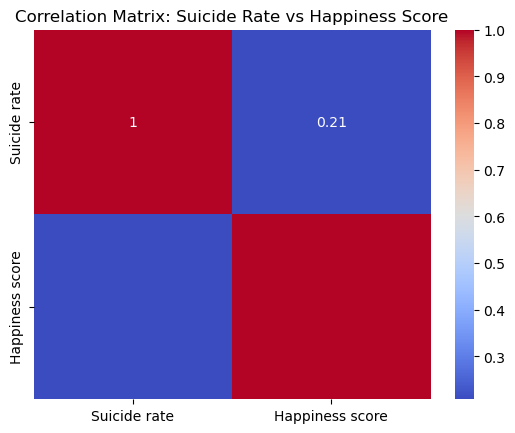


Correlation between Suicide rate and Happiness score: 0.20833625197190944


In [34]:
correlation_matrix = health_df[['Suicide rate', 'Happiness score']].corr()
# print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Suicide Rate vs Happiness Score')
plt.show()

correlation_value = health_df['Suicide rate'].corr(health_df['Happiness score'])
print("")
print(f"Correlation between Suicide rate and Happiness score: {correlation_value}")

Secondly, I decided to include a geographical map to complement the quantitative analysis with a visual representation of the distribution of happiness scores and suicide rates across different countries. This graphical approach allowed for a spatial understanding, showcasing potential patterns or variations in these factors based on geographic location. We wanted to potentially indicate any geographical clustering or disparities among countries.

In [31]:
# SUICIDE RATE
fig = px.choropleth(
    health_df,
    locations='Country',
    locationmode='country names',
    color='Suicide rate',
    hover_name='Country',
    projection='natural earth',
    title='Suicide Rate by Country'
)
fig.show()

# HAPPINESS RATE
fig = px.choropleth(
    health_df,
    locations='Country',
    locationmode='country names',
    color='Happiness score',
    hover_name='Country',
    projection='natural earth',
    title='Happiness by Country'
)
fig.show()

#### Hypthesis Testing

Next we used a __Linear Regression Model__ to obtain a quantative understanding between suicide rate and happiness score. We estimated the coefficient and intercept of the model to find the general direction and magnitide of the relationship. We had suicide rate as the x-value and happiness score as the y-value, then used a simple line chart to show the relationship.

Coefficient: 22.59
Intercept: 6115.47


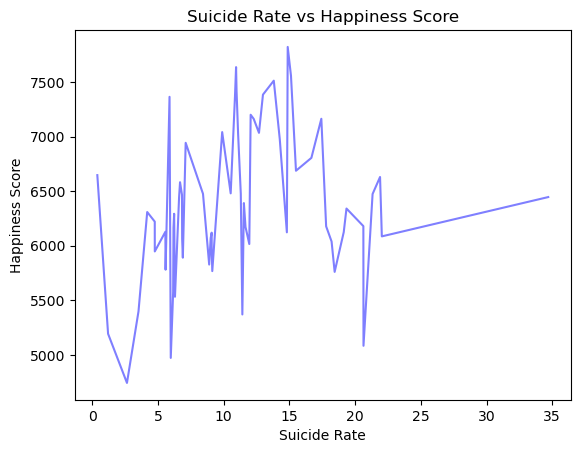

In [6]:
X = health_df[['Suicide rate']]
y = health_df['Happiness score']

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

sns.lineplot(x=health_df['Suicide rate'], y=health_df['Happiness score'], color='blue', alpha=0.5)
plt.title('Suicide Rate vs Happiness Score')
plt.xlabel('Suicide Rate')
plt.ylabel('Happiness Score')

plt.show()

The data showed us that for each unit increase in the suicide rate, there is an estimated increase of 22.59 units in the happiness score. Additionally, the intercept value of 6115.47 indicates the baseline level of happiness score when suicide rate is zero.

**Observations**: The graph displays a fluctuating pattern, which may indicate that the relationship between suicide rate and happiness score might not strictly follow a linear trend. The erratic pattern also might indicate that various other factors beyond the suicide rate significantly impact happiness scores. Overall the graph displays a non-monotonic relationship. However, overall, the graph generally kept an upwards direction.


#### Bootstrapped graph 

We included a bootstrapped graph to further assess the relationship between variables. We created 100 bootstrapped samples of the same size as the original dataset are created. Each sample was generated by random resampling with replacement. Subsequently, linear regression models were built for each bootstrapped sample, focusing on the 'suicide_rate' as the predictor and 'Happiness score' as the target variable. We kept the domain for suicide rate from 0 to 30 as to stay consistent to the range of the suicide rate across all countries. 

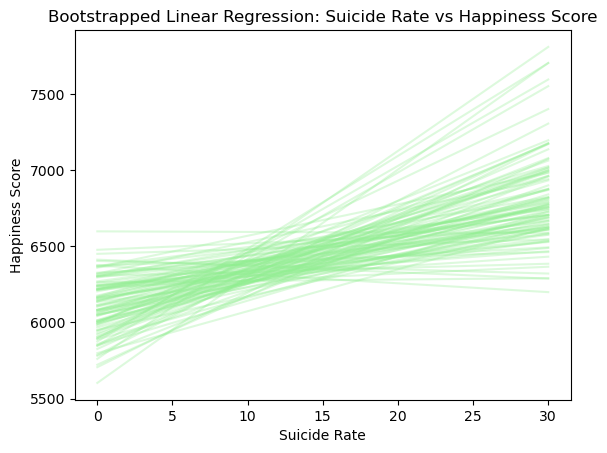

In [7]:

domain = np.array([[0], [30]]) 
bootstrapped_health = []

for _ in range(100):
    bootstrapped_sample = health_df.sample(len(health_df), replace=True)
    bootstrapped_health.append(bootstrapped_sample)

for i in range(100):
    df = bootstrapped_health[i]

    bt_model = LinearRegression()
    bt_model.fit(df[['Suicide rate']].values, df['Happiness score'])

    y_pred = bt_model.predict(domain)

    sns.lineplot(x=domain.reshape(-1), y=y_pred, color='lightgreen', alpha=0.3)    

plt.xlabel('Suicide Rate')
plt.ylabel('Happiness Score')
plt.title('Bootstrapped Linear Regression: Suicide Rate vs Happiness Score')
plt.show()

__Observations__ 
1. The bootstrapped linear regression generated a large range of predicted relationships between suicide rates and happiness scores. It represented that various predicted trends that could arise from different subsamples of the dataset.
2. The graph consistently had a upward direction. This can be observed by the dark green centered betweened the varied possibilities. This suggest that a more stable relationship between the variables across multiple subsamples.


### Evulation of Significance

We used a **OLS summary** to evaluate the significance and reliability of the data. We inputed the data into the OLS model and printed the summary.

In [8]:
def summary(df, input):
    X = df[input]
    reg = sm.OLS(df['Happiness score'], X).fit()
    print(reg.summary())
    
    
summary(health_df, ['Suicide rate'])

                                 OLS Regression Results                                
Dep. Variable:        Happiness score   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              216.7
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    9.58e-22
Time:                        20:26:05   Log-Likelihood:                         -584.47
No. Observations:                  62   AIC:                                      1171.
Df Residuals:                      61   BIC:                                      1173.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

__Observation__: The data showed that the model has around 78% variance without centering the variable. Looking at the F-statistic probability, the probability is extremely low (9.58e-22), indicating the model's significance is highly unlikely due to random chance. Additionally, p-value is 0.00 which is way below the 0.05 threshold.
However, due to the high variance of the data, it might indicate that the model is too complex or flexible, capturing noise or specific patterns in the dataset rather than the underlying true relationships.

Additionally we used **permutations** to test for randomness and significance in the data. First we extracted values from the suicide rate, then we randomly shuffled them to create a random assortment of values. We then changed the original suicide rate values to the shuffled values. We created a linear regression model based off of those results, and created a side to side visualtion of the original data to the permuted data

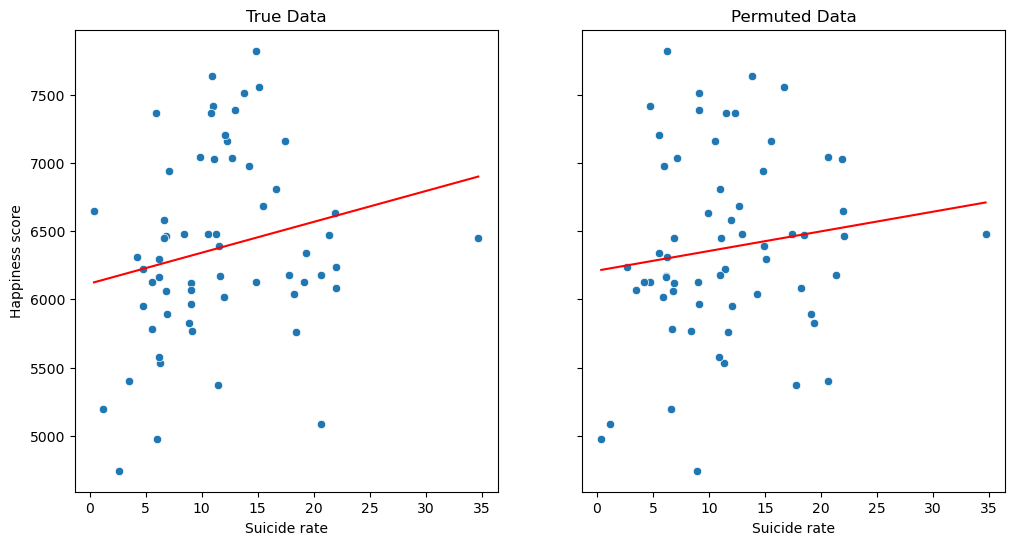

In [9]:
# Make copy
permuted_health_df = health_df.copy()
# take value
suicide_rates = permuted_health_df['Suicide rate'].values
# get random assortment of suicide rate
np.random.shuffle(suicide_rates)
permuted_health_df['Suicide rate'] = suicide_rates

# input into linear regression model
model_permuted = LinearRegression()
model_permuted.fit(permuted_health_df[['Suicide rate']], permuted_health_df['Happiness score'])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# original
sns.scatterplot(x='Suicide rate', y='Happiness score', data=health_df, ax=ax1)
sns.lineplot(x=health_df['Suicide rate'], y=model.predict(health_df[['Suicide rate']]), color='red', ax=ax1)
ax1.set_title('True Data')

# permuted
sns.scatterplot(x='Suicide rate', y='Happiness score', data=permuted_health_df, ax=ax2)
sns.lineplot(x=permuted_health_df['Suicide rate'], y=model_permuted.predict(permuted_health_df[['Suicide rate']]), color='red', ax=ax2)
ax2.set_title('Permuted Data')

plt.show()

__Observation__: Looking at the different permutations of the graph, the observed relationship differs significantly from the relationships derived from permutations. This suggests that the observed association is not likely to happen by random chance alone. In other words, it demonstrates the data is distinguishable from randomness. Overall, it shows the data may be significant.

___
## Hypothesis 2: 

$H_O$: Population sizes of countries, birth rates, minimum wages, and crime index do not lead to higher happiness scores for countries.

$H_A$: Population sizes of countries, birth rates, minimum wages, and crime index lead to higher happiness scores for countries.

### **Data Analysis**

For the second question, our overall goal is to perform a linear regression using crime index, minimum wage, birth rate, and population size as inputs to happiness score as an output. 

To complete this, we want to check for heteroskedasticity and multicollinearity to ensure the variables are valid to be used in a multivariable linear regression. 

First, we will check for heteroskedasticity. We will make residual plots between between each input variable and the output variable. This is to ensure that the data points are randomly distributed. We check to see if there are any signs of heteroskedasticity, which is indicated by a fan shape. The following graphs show this check for heteroskedasticity, revealing that there is no heteroskedasticity in the data. 

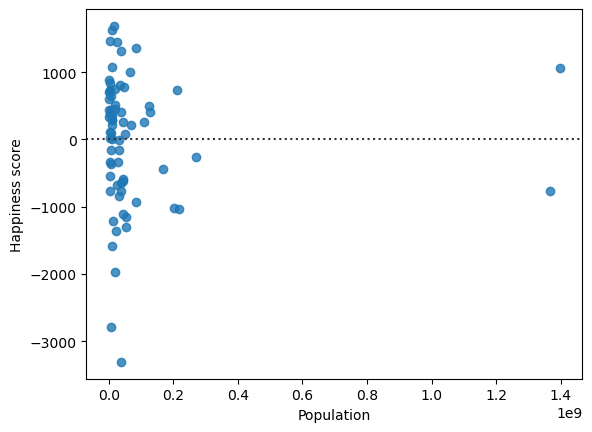

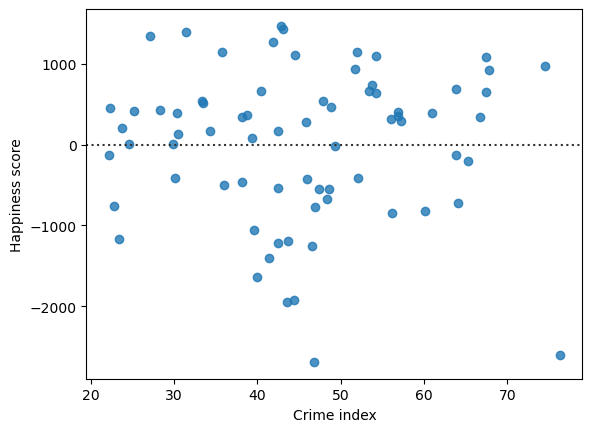

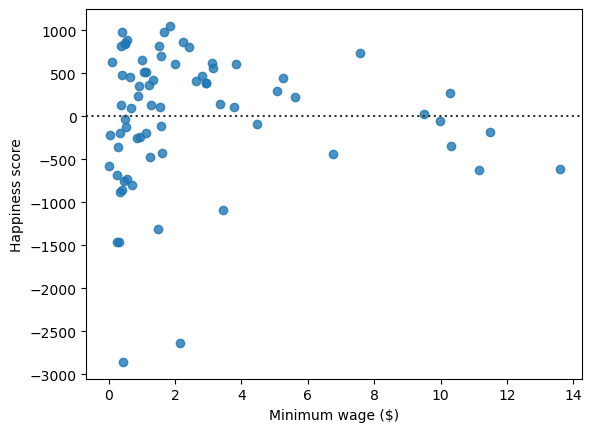

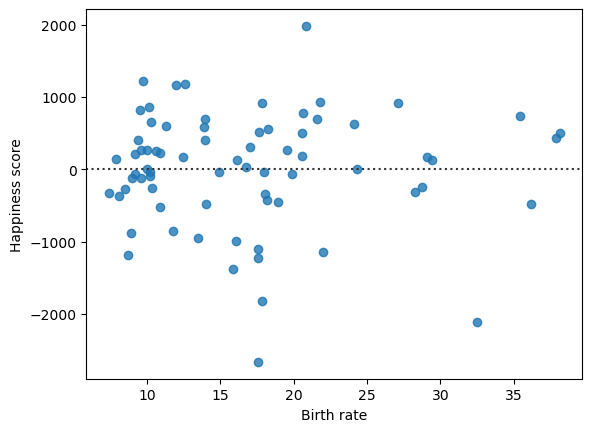

In [10]:
columns = hypothesis2_df.columns[1:5]
for i in columns:
    sns.residplot(data=hypothesis2_df, x=i, y='Happiness score')
    plt.show()

However, we notice two outliers in the population data. Thus, we will perform a log transformation on the population data to account for this and show the data in a more clear manner. Here is the updated dataframe including the new log values. 

In [26]:
hypothesis2_df

,Country,Population,Crime index,Minimum wage ($),Birth rate,Happiness score,Log population
0,Afghanistan,38041754.0,76.31,0.43,32.49,2404.0,17.454195
1,Albania,2854191.0,42.53,1.12,11.78,5199.0,14.864299
2,Algeria,43053054.0,52.03,0.95,24.28,5122.0,17.577944
3,Armenia,2957731.0,22.79,0.66,13.99,5399.0,14.899933
4,Australia,25766605.0,43.03,13.59,12.60,7162.0,17.064590
...,...,...,...,...,...,...,...
67,Kazakhstan,18513930.0,53.77,0.41,21.77,6234.0,16.734034
68,Nigeria,200963599.0,64.06,0.54,37.91,4552.0,19.118634
69,Argentina,44938712.0,63.82,3.35,17.02,5967.0,17.620810
70,Lithuania,2786844.0,33.42,2.41,10.00,6446.0,14.840420


Below is the new graph for population, showing the log of population values compared to happiness score.

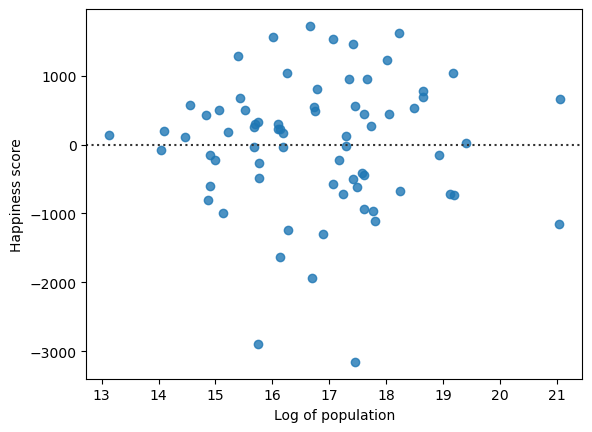

In [34]:
hypothesis2_df["Log population"] = np.log(hypothesis2_df["Population"])
sns.residplot(data=hypothesis2_df, x="Log population", y="Happiness score")
plt.xlabel("Log of population")
plt.show()

Next, we make a correlation matrix that includes the factors of population, crime index, minimum wage, birth rate, and happiness score. The goal is to compare how crime index, minimum wage, and birth rate are correlated to population, and how population is correlated to happiness score. This addresses the more nuanced element of our analysis, where we want to understand if smaller population leads to more happiness, and if lower birth rates, higher minimum wages, and lower crime index relate to smaller population size.

From the correlation matrix, we can determine there is no multicollinearity between variables, as none of their correlations are high (close to 1 or -1). Therefore, we do not need to drop any of these predictor variables for the regression.

In [31]:
correlation = hypothesis2_df[['Log population', 'Crime index', 'Minimum wage ($)', 'Birth rate', 
                              'Happiness score']].corr()
correlation

,Log population,Crime index,Minimum wage ($),Birth rate,Happiness score
Log population,1.000000,0.176193,-0.066379,0.248930,-0.276257
Crime index,0.176193,1.000000,-0.328737,0.534143,-0.292256
Minimum wage ($),-0.066379,-0.328737,1.000000,-0.453007,0.621926
Birth rate,0.248930,0.534143,-0.453007,1.000000,-0.582908
Happiness score,-0.276257,-0.292256,0.621926,-0.582908,1.000000


We then construct a heat map to show a more visual representation of the correlations.

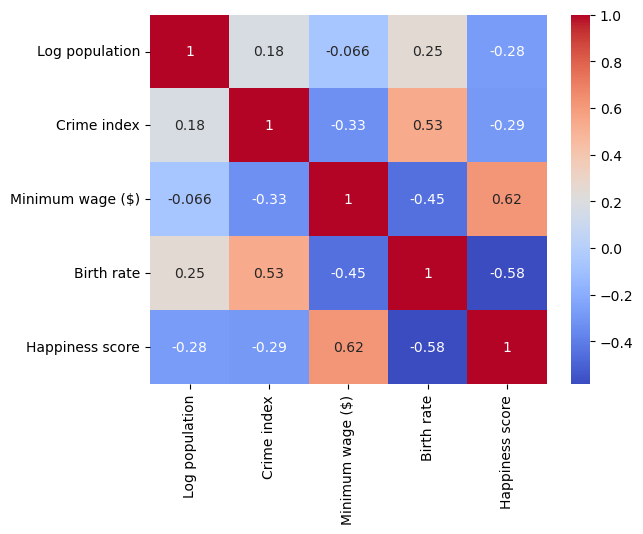

In [32]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

#### Visualizing with Seaborn Regplot: 
Here, we are using Seaborn’s regplot function to visualize the relationship between ‘Crime Index’, ‘Minimum wage($)’, ‘birth_rate’, and ‘Population’ (independent variables) and ‘Happiness Score’ (dependent variable). The data is represented as a scatter plot, with a linear regression model fit plotted on top of the data. The translucent band around the regression line represents the 95% confidence interval for the regression estimate. 

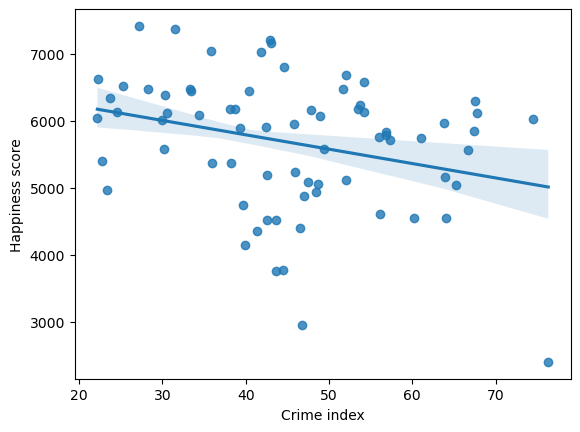

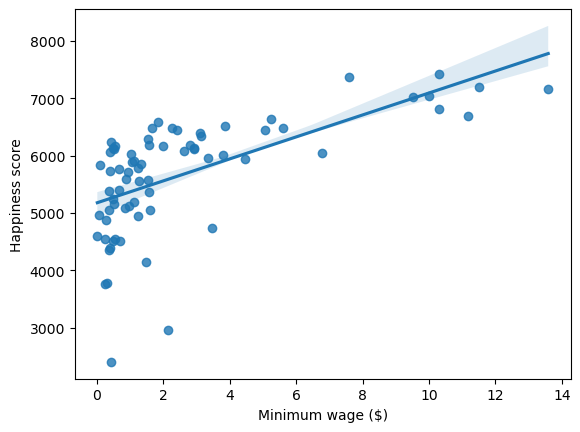

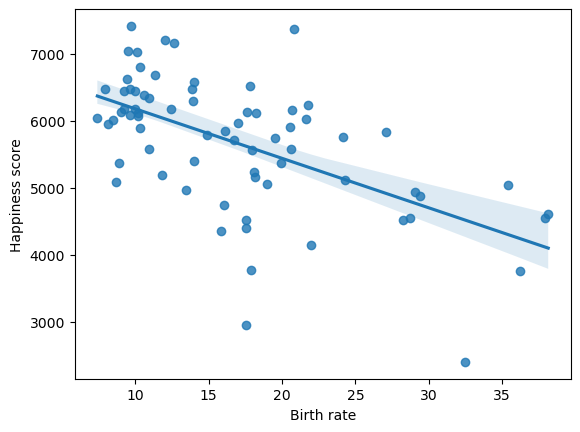

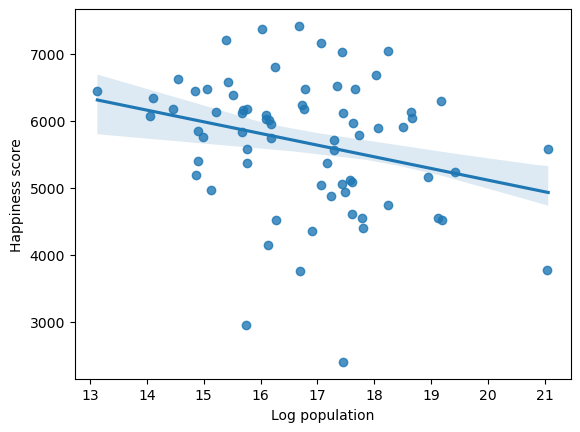

In [33]:
x_vars = ['Crime index', 'Minimum wage ($)', 'Birth rate', 'Log population']  
for x_var in x_vars:
    ax = sns.regplot(data=hypothesis2_df , x=x_var, y='Happiness score', n_boot=10)
    plt.show()

#### OLS Regression Results: 

In [30]:
input = ['Crime index', 'Minimum wage ($)', 'Birth rate', 'Log population'] 
def summary(df, input):
    X = df[input]
    reg = sm.OLS(df['Happiness score'], X).fit()
    print(reg.summary())
summary(hypothesis2_df, input)

                                 OLS Regression Results                                
Dep. Variable:        Happiness score   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              607.5
Date:                Tue, 28 Nov 2023   Prob (F-statistic):                    2.08e-52
Time:                        21:39:33   Log-Likelihood:                         -595.84
No. Observations:                  72   AIC:                                      1200.
Df Residuals:                      68   BIC:                                      1209.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### Evaluation of significance: 
- **Crime Index**: The coefficient is 89.508, and the p-value is 0.000. According to our model, for each unit increase in Crime index, all else equal, we expect the happiness score to increase by 89.508. The p-value is less than 0.05, indicating that this result is statistically significant.

- **Minimum wage**: The coefficient is 413.640, and the p-value is 0.000. According to our model, for each unit increase in Minimum wage, all else equal, we expect the happiness score to increase by 413.640. The p-value is less than 0.05, indicating that this result is statistically significant.

- **Birth Rate**: The coefficient is 10.212, and the p-value is 0.728. According to our model, for each unit increase in Birth rate, all else equal, we expect the happiness score to increase by 10.212. However, the p-value is greater than 0.05, indicating that this result is not statistically significant.

- **Population**: The coefficient is 6.08e-07, and the p-value is 0.459. According to our model, for each unit increase in Population, all else equal, we expect the happiness score to increase by 6.08e-07. However, the p-value is greater than 0.05, indicating that this result is not statistically significant.

## Interpretation and Conclusions

**Interpretation**:

1. Our analysis showed a __significant positive relationship between suicide rate and happiness score__. Looking at the coefficient and intercept of our linegraph, we can say theres a 22.59 increase in happiness score per 1 unit increase in suicide rate. Therefore, countries that reported to be happier had overall more suicides than countries that were deemed less happy. However, the bootstrapped data showed our data was varied and had wide range of outcomes. This could be due to the high R-square value (78%) which may have clouded our data. The OLS summary and permutation model showed that our data was significant, with our F-statistic being 9.58e-22. Additionally the p-value was 0.00, suggesting that 'suicide_rate' significantly predicted 'Happiness score'.
    
2. From the heatmap, we can see that crime index has a weak negative correlation with population (-0.053). Minimum wage also has a weak negative correlation with population (-0.13). Birth rate has a weak positive correlation with population (0.00076). From the heatmap, correlations between the various factors and population do not appear strong. We are particularly interested to see if there is a relationship between population size and happiness score. Population has a weak negative correlation with happiness score (-0.2). Thus, there does not appear to be a strong correlation between population and happiness score. According to the heatmap, minimum wage seems to have the strongest positive correlation to happiness score (0.62). Birth rate has the strongest negative correlation to happiness score (-0.58).

3. To answer our second research question, we ran an OLS regression model to examine the relationship between the happiness score of 72 countries and four independent variables: crime index, minimum wage, birth rate, and population. Based on the p-values, we can reject the null hypothesis for the coefficients of crime index and minimum wage, concluding that they are both statistically significant predictors of the happiness score. However, we cannot reject the null hypothesis for the coefficients of birth rate and population, which means that they are not statistically significant predictors of the happiness score. 

4. The model suggests that the condition number of the model is large (7.27e+07), which might indicate strong multicollinearity or other numerical problems. The population variable affects the reliability and accuracy of our model. We can consider transforming the Population variables to investigate these issues.

**Conclusion**:

Our findings suggest a notable association between higher reported happiness and higher suicide rates among countries. While the regression model demonstrated significance, further scrutiny of assumptions and model refinement is crucial to ensure its reliability and applicability to varied scenarios. For future steps, I'd consider looking into the residual plots of the suicide rate. 

There does not appear to be strong correlations with crime index, minimum wage, and birth rate to population size. There also does not appear to be a strong correlation between population and happiness score.

## Limitations


__1.__ Here are some limitations of the data used for Hypothesis 1:

  - The Suicide Number CSV may have accuracy problems through the collection process. It is hard to account for all the suicides globally since it doesn’t account for missing people, doesn’t account for underreportings, and we don’t know what constitutes as a suicide. 

  - When merging our initial data frames, we only included countries that were present in all dataframes we merged. Thus, only the data from select countries is used and it is not a comprehensive list.
  
  - The data points are very scattered so it is hard to indicate a pattern in the relationship of suicide rate and happiness score.

__2.__ Though the global country information dataset is very comprehensive and has over 18,000 downloads, there isn’t clear documentation of its sources and how the data was collected. Thus, there is some ambiguity associated with reporting findings based on this data.

__3.__ The world happiness report data is not up to date to 2023, so we have chosen to use the most recent data collected from 2022 in our analysis. This could potentially alter our findings as it may not completely and accurately reflect the current situation.

__4.__ The world happiness report data was mainly collected through a survey, the Gallup World Survey. Thus, there could be selection biases in the responses and the data may not be completely representative of the whole population.

__5.__ The Crime Rate By Country 2023 CSV dataset that we used doesn’t clearly explain how the 'crime index' is calculated, which raises concerns about potential bias in data collection.

__6.__ The geography map made it difficult to compare data between the suicide rate and happiness score since it quanitified the effects in number rather numerics. 